<h1><center> Анализ мировой успешности компьютерных игр </center></h1>

**Цель проекта**: выявить определяющие успешность игры закономерности.

Для работы мы имеем файл с историческими данными о продажах игр, оценками пользователей и экспертов, жанрами и платформами:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**План работы**:

1. Обзор данных.
2. Первичная обработка данных.
3. Исследовательский анализ данных.
4. Составление портрета пользователя по регионам.
5. Проверка гипотез.
6. Общий вывод.

In [1]:
# Импортируем необходимые библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from IPython.display import display

## Обзор данных.

In [2]:
# Прочитаем датасет.
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# Изучим общую информацию о датасете.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таким образом, мы имеет датафрейм, состоящий из 16715 строк и 11 столбцов.

## Первичная обработка данных.

### Обработка названия столбцов.

In [4]:
# Приведем названия столбцов к нижнему регистру.
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данных в нужные типы.

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [6]:
#data['user_score'] = pd.to_numeric(data['user_score'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Мы преобразовали столбец с годом в целое число. Также попробовали преобразовать столбец с оценкой пользователей в вещественное число, однако вышла ошибка, так как в данных этого столбца есть аббревиатура, поэтому в дальнейшем с ней необходимо разобраться и попробовать еще раз перевести столбец к числовому типу.

### Обработка пропусков и дубликатов.

In [8]:
# Посмотрим, сколько пропусков имеется в датафрейме.
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Таким образом, пропущенные значения имеются в столбцах с названием игры, годом выпуска, оценкой критиков, оценкой пользователем и рейтингом.

Удалим строки с пропусками в названии игр, так как названия игр мы узнать не сможем.

In [9]:
data = data.dropna(subset=['name'])
data['name'].isna().sum()

0

Удалим строки с пропусками в годах выпуска, так как их довольно много, чтобы пытаться узнать каждый пропущенный год для конкретной игры.

In [10]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'].isna().sum()

0

Пропуски в столбцах с оценками критиков и пользователей мы оставим, как есть, так как их заполнение в дальнейшем может исказить результаты корреляционного анализа и статистических тестов.

Пропуски в столбце с рейтингом заполним значением "Не определен", так как это категориальная переменная.

In [11]:
data['rating'] = data['rating'].fillna('Не определен')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Не определен
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Не определен


К пропускам могли привести отсутствие информации по конкретной переменной, а также субъективные факторы, например, невнимательность при заполнении таблицы, и технические факторы.

Обработаем значение 'tbd' в столбце с оценкой пользователей.

In [12]:
data.loc[data['user_score']=='tbd'].shape

(2376, 11)

Таким образом, количество строк со значением 'tbd' в столбце с оценкой пользователей равно 2376.

In [13]:
# Заменим значения 'tbd' на пропущенные значения.
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan
data['user_score'].isna().sum()

8981

Приведем данные столбца с оценкой пользователей к вещественному типу.

In [14]:
data['user_score'] = pd.to_numeric(data['user_score'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [16]:
# Проверим наличие дубликатов.
data.duplicated().sum()

0

Явных дубликатов не обнаружено.

Попробуем посмотреть, есть ли дубликаты в связке "название - платформа - год".

In [17]:
data.duplicated(['name', 'platform', 'year_of_release']).sum()

1

Есть один дубликат. Удалим его.

In [18]:
data = data.drop_duplicates(['name', 'platform', 'year_of_release']).reset_index(drop=True)
data.duplicated(['name', 'platform', 'year_of_release']).sum()

0

### Создание столбца с суммарными продажами.

In [19]:
# Создадим столбец с суммарными продажами во всех регионах.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Не определен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Не определен,31.38


## Исследовательский анализ данных.

### Количество выпущенных игр по годам.

In [20]:
ax = data.groupby('year_of_release')['year_of_release'].count()
ax

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

Text(0.5, 0, 'Год')

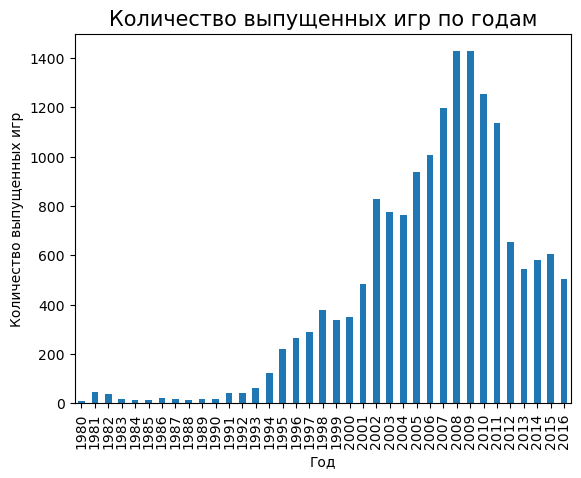

In [21]:
ax.plot(kind='bar')
plt.title('Количество выпущенных игр по годам', fontsize=15)
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Год')

Таким образом, мы видим, что количество игр стало резко расти в 1994 году и к 2008 году увеличилось почти в 12 раз. А после 2009 года количество выпускаемых игр стало резко падать. В 2016 году оно составило 502 игры, что почти в 3 раза меньше, чем в 2008 году. Также примерно одинаковое количество игр выпускается за последние 5 лет.

Данные за все периоды нам не важны, поскольку изначально, с 1980 года по 2000 год, игр выпускалось не так много.

### Продажи по платформам.

In [22]:
# Построим таблицу с суммарными продажами для каждой платформы.
at = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
at

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [23]:
# Отберем платформы с суммарными продажами больше 700 млн копий.
at = at[at>700]
at

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
Name: total_sales, dtype: float64

Мы получили топ-6 платформ по суммарным продажам. Построим отдельно для каждой отобранной платформы распределение суммарных продаж по годам.

In [24]:
ps2 = data.query('platform == "PS2"')
ps2_pivot = ps2.groupby('year_of_release').agg({'total_sales':'sum'})
ps2_pivot

,total_sales
year_of_release,
2000,39.17
2001,166.43
2002,205.38
2003,184.31
2004,211.81
2005,160.66
2006,103.42
2007,75.99
2008,53.90


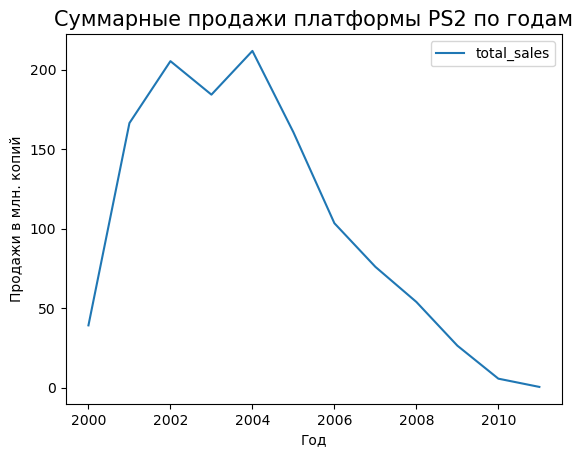

In [25]:
ps2_pivot.plot()
plt.title('Суммарные продажи платформы PS2 по годам', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Год');

По графику мы видим, что платформа PS2 просуществовала 12 лет, с 2000 по 2011 год. Своего расцвета она достигла спустя 2 года после появления, а становится менее популярной - спустя 6 лет.

In [26]:
X360 = data.query('platform == "X360"')
X360_pivot = X360.groupby('year_of_release').agg({'total_sales':'sum'})
X360_pivot

,total_sales
year_of_release,
2005,8.25
2006,51.62
2007,95.41
2008,135.26
2009,120.29
2010,170.03
2011,143.84
2012,99.74
2013,88.58


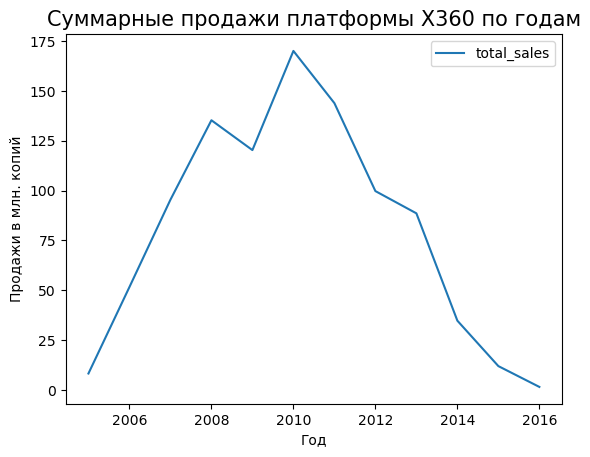

In [27]:
X360_pivot.plot()
plt.title('Суммарные продажи платформы X360 по годам', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Год');

По графику мы видим, что платформа X360 просуществовала 12 лет, с 2005 по 2016 год. Довольно популярной она стала спустя 3 года после появления, а спустя 7 лет после появления стала постепенно терять свою популярность.

In [28]:
ps3 = data.query('platform == "PS3"')
ps3_pivot = ps3.groupby('year_of_release').agg({'total_sales':'sum'})
ps3_pivot

,total_sales
year_of_release,
2006,20.96
2007,73.19
2008,118.52
2009,130.93
2010,142.17
2011,156.78
2012,107.35
2013,113.25
2014,47.76


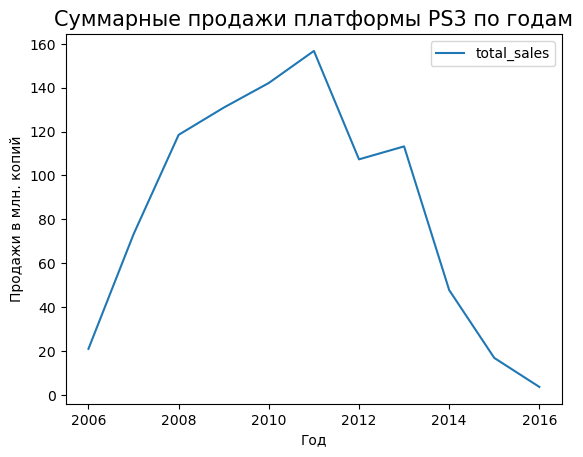

In [29]:
ps3_pivot.plot()
plt.title('Суммарные продажи платформы PS3 по годам', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Год');

По графику мы видим, что платформа PS3 просуществовала 11 лет, с 2006 по 2016 год. Довольно популярной она стала спустя 3 года после появления, а спустя 7 лет после появления стала постепенно терять свою популярность.

In [30]:
wii = data.query('platform == "Wii"')
wii_pivot = wii.groupby('year_of_release').agg({'total_sales':'sum'})
wii_pivot

,total_sales
year_of_release,
2006,137.15
2007,152.77
2008,171.32
2009,206.97
2010,127.95
2011,59.65
2012,21.71
2013,8.59
2014,3.75


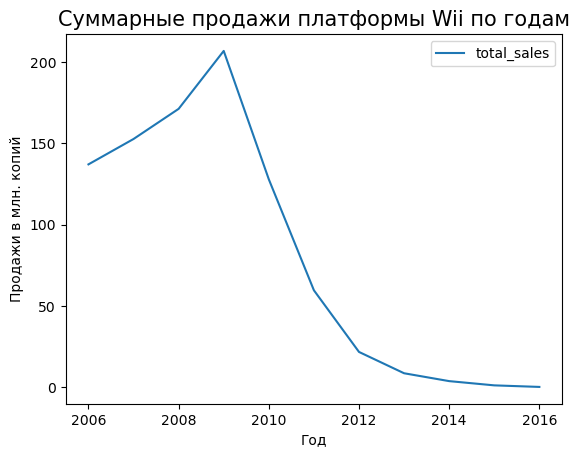

In [31]:
wii_pivot.plot()
plt.title('Суммарные продажи платформы Wii по годам', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Год');

По графику мы видим, что платформа Wii просуществовала 11 лет, с 2006 по 2016 год. Своего расцвета она достигла спустя 3 года после появления, а спустя 4 года после появления стала терять свою популярность.

In [32]:
ds = data.query('platform == "DS"')
ds_pivot = ds.groupby('year_of_release').agg({'total_sales':'sum'})
ds_pivot

,total_sales
year_of_release,
1985,0.02
2004,17.27
2005,130.14
2006,119.81
2007,146.94
2008,145.31
2009,119.54
2010,85.02
2011,26.18


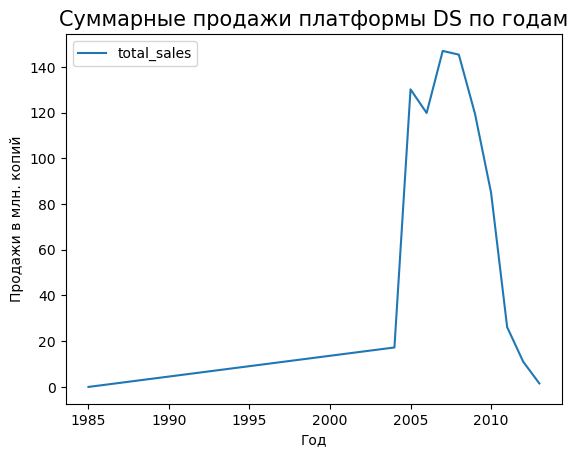

In [33]:
ds_pivot.plot()
plt.title('Суммарные продажи платформы DS по годам', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Год');

По графику мы видим, что платформа DS просуществовала 27 лет, с 1985 по 2011 год. Это довольно долгий период, по сравнению с другими прибыльными платформами. Однако своего расцвета она достигла только спустя 20 года после появления, а спустя 24 года после появления стала снова терять свою популярность.

In [34]:
ps = data.query('platform == "PS"')
ps_pivot = ps.groupby('year_of_release').agg({'total_sales':'sum'})
ps_pivot

,total_sales
year_of_release,
1994,6.03
1995,35.96
1996,94.70
1997,136.17
1998,169.49
1999,144.53
2000,96.37
2001,35.59
2002,6.67


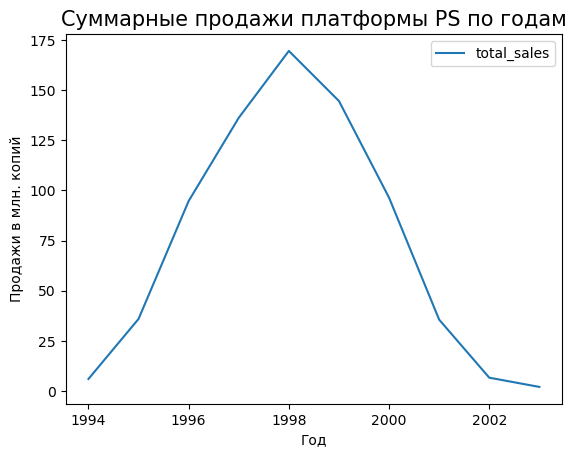

In [35]:
ps_pivot.plot()
plt.title('Суммарные продажи платформы PS по годам', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Год');

По графику мы видим, что платформа PS просуществовала 10 лет, с 1994 по 2003 год. Своего расцвета она достигла спустя 4 года после появления, а спустя 5 лет после появления стала постепенно терять свою популярность.

**Таким образом, мы видим по графикам, что в среднем платформы живут около 11 лет.**

*Для дальнейшей работы нам необходимы данные за актуальный период. Опираясь на выводы, сделанные в предыдущих вопросах, возьмем данные за последние пять лет, то есть с 2012 по 2016 год, так как за этот период выпускалось примерно одинаковое количество игр, а также половина жизни платформы равна приблизительно пяти годам.*

In [36]:
# Отберем для последующей работы данные за 2012-2016 гг.
dt = data.query('year_of_release>=2012')
dt.head(10)

C:\Users\Катерина\AppData\Local\Temp\ipykernel_7208\1176888251.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  dt = data.query('year_of_release>=2012')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Не определен,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Не определен,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Не определен,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


In [37]:
print(dt.shape)
dt['year_of_release'].unique()

(2885, 12)


<IntegerArray>
[2013, 2015, 2012, 2014, 2016]
Length: 5, dtype: Int64

Таким образом, мы будем работать с датафреймом, состоящим из 2885 строк.

### Анализ прибыльности платформ.

In [38]:
# Построим сводную таблицу с прибыльностью платформ по годам.
p_table = dt.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
p_table

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [39]:
# Построим сводную таблицу с суммарной прибыльностью платформ.
dat = dt.pivot_table(index='platform', values='total_sales', aggfunc='sum')
dat.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


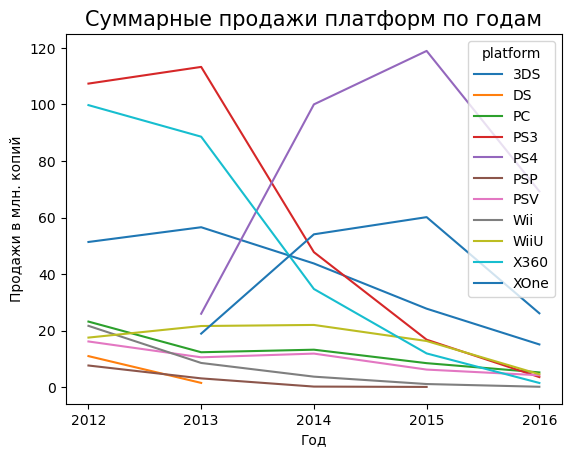

In [40]:
p_table.plot()
plt.xticks([2012, 2013, 2014, 2015, 2016])
plt.title('Суммарные продажи платформ по годам', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Год');

Судя по таблице и графику, за последние 5 лет по продажам лидируют платформы PS4, PS3 и X360. Если не брать во внимание данные за 2016 год, так как они могут быть неполными, то можно сказать, что растут в продажах платформы PS4 и XOne. Заметно падают в продажах платформы PS3, X360 и 3DS. Остальные платформы последние 5 лет находятся на низком уровне по продажам.

**Таким образом, опираясь на вышеописанный жизненный цикл платформ и данный график, к потенциально прибыльным платформам можно отнести самые молодые и растущие в продажах платформы PS4 и XOne.**

### Глобальные продажи игр.

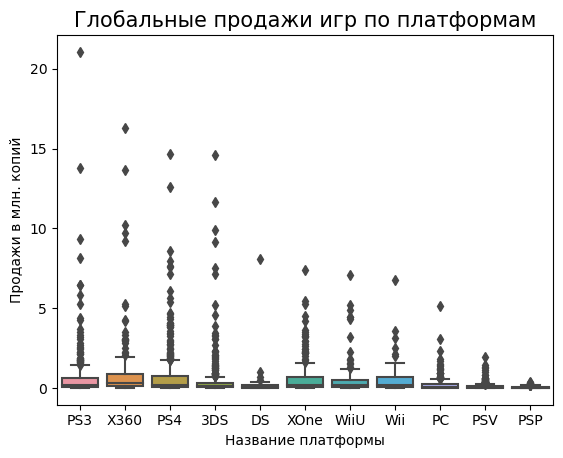

In [41]:
ax = sns.boxplot(data=dt, x='platform', y='total_sales')
ax.set_title('Глобальные продажи игр по платформам', fontsize=15)
ax.set_xlabel('Название платформы')
ax.set_ylabel('Продажи в млн. копий');

На данном графике мы видим слишком значительные выбросы, из за которых плохо видно сам "ящик", поэтому попробуем ограничить ось y.

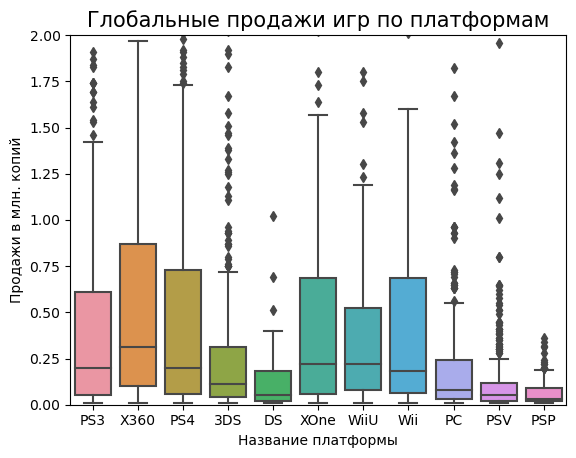

In [42]:
ax = sns.boxplot(data=dt, x='platform', y='total_sales')
ax.set(ylim=(0, 2))
ax.set_title('Глобальные продажи игр по платформам', fontsize=15)
ax.set_xlabel('Название платформы')
ax.set_ylabel('Продажи в млн. копий');

Таким образом, на графике можно заметить наличие большого количества выбросов. Они могут свидетельствовать о том, что платформа периодически выпускает очень популярные игры. Такими лидерами по выбросам являются платформы PS3, X360, PS4 и 3DS. Платформы PS3, X360 и PS4 являются также наиболее прибыльными за изучаемый период. Наиболее стабильные платформы за последние 5 лет (не считая DS и PSP, которые перестали продавать игры в 2013 и 2015 гг. соответственно) - это PSC и PC.

### Взаимосвязь продаж и отзывов.

Возьмем три популярные платформу (PS4, PS3 и XOne) и посмотрим, как влияют на продажи отзывы критиков и пользователей.

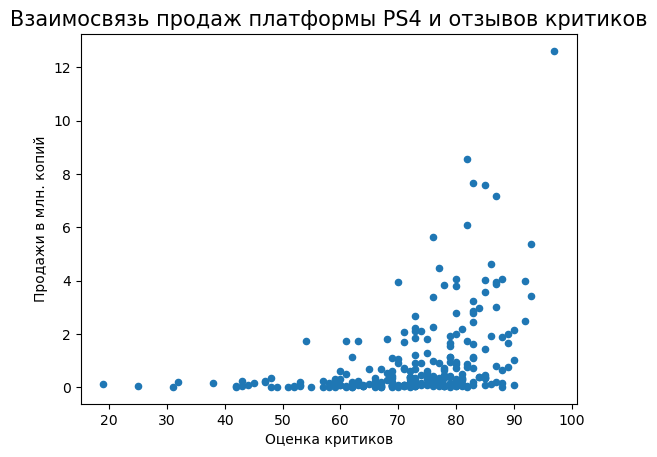

In [43]:
# Построим диаграмму рассеяния для суммарных продаж платформы PS4 и отзывов критиков.
PS4 = dt.query('platform == "PS4"')
PS4.plot(y='total_sales', x='critic_score', kind='scatter')
plt.title('Взаимосвязь продаж платформы PS4 и отзывов критиков', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Оценка критиков');

In [44]:
# Посчитаем коэффициент корреляции для суммарных продаж платформы PS4 и отзывов критиков.
corr = PS4['total_sales'].corr(PS4['critic_score']).round(2)
print('Коэффициент корреляции для суммарных продаж платформы PS4 и отзывов критиков:', corr)

Коэффициент корреляции для суммарных продаж платформы PS4 и отзывов критиков: 0.41


Таким образом, мы можем наблюдать среднюю прямую связь между продажами платформы PS4 и отзывами критиков.

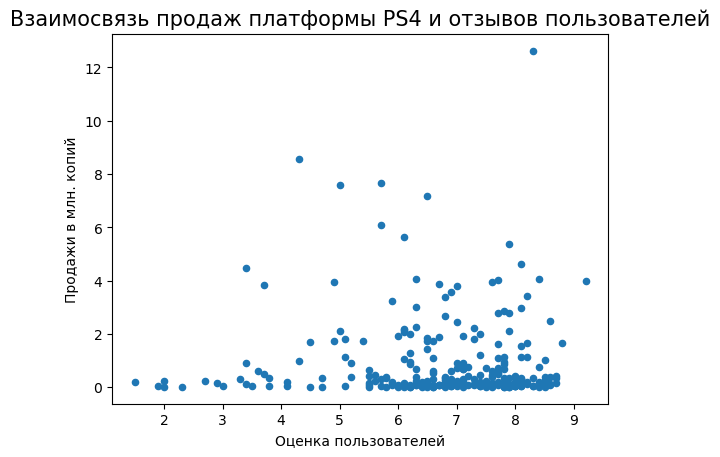

In [45]:
# Построим диаграмму рассеяния для суммарных продаж платформы PS4 и отзывов пользователей.
PS4 = dt.query('platform == "PS4"')
PS4.plot(y='total_sales', x='user_score', kind='scatter')
plt.title('Взаимосвязь продаж платформы PS4 и отзывов пользователей', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Оценка пользователей');

In [46]:
# Посчитаем коэффициент корреляции для суммарных продаж платформы PS4 и отзывов пользователей.
corr = PS4['total_sales'].corr(PS4['user_score']).round(2)
print('Коэффициент корреляции для суммарных продаж платформы PS4 и отзывов пользователей:', corr)

Коэффициент корреляции для суммарных продаж платформы PS4 и отзывов пользователей: -0.03


Таким образом, связи между продажами платформы PS4 и отзывами пользователей мы не наблюдаем, так как коэффициент корреляции слишком мал.

In [47]:
print(PS4.shape)
PS4.isna().sum()

(392, 12)


name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       140
user_score         135
rating               0
total_sales          0
dtype: int64

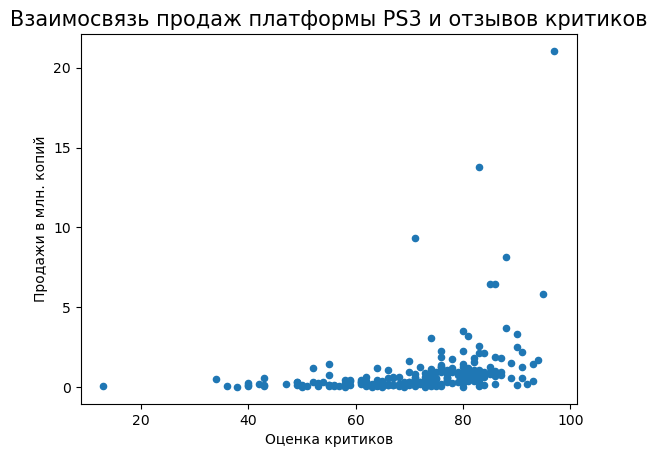

In [48]:
# Построим диаграмму рассеяния для суммарных продаж платформы PS3 и отзывов критиков.
PS3 = dt.query('platform == "PS3"')
PS3.plot(y='total_sales', x='critic_score', kind='scatter')
plt.title('Взаимосвязь продаж платформы PS3 и отзывов критиков', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Оценка критиков');

In [49]:
# Посчитаем коэффициент корреляции для суммарных продаж платформы PS3 и отзывов критиков.
corr = PS3['total_sales'].corr(PS3['critic_score']).round(2)
print('Коэффициент корреляции для суммарных продаж платформы PS3 и отзывов критиков:', corr)

Коэффициент корреляции для суммарных продаж платформы PS3 и отзывов критиков: 0.33


Таким образом, мы можем наблюдать среднюю прямую связь между продажами платформы PS3 и отзывами критиков.

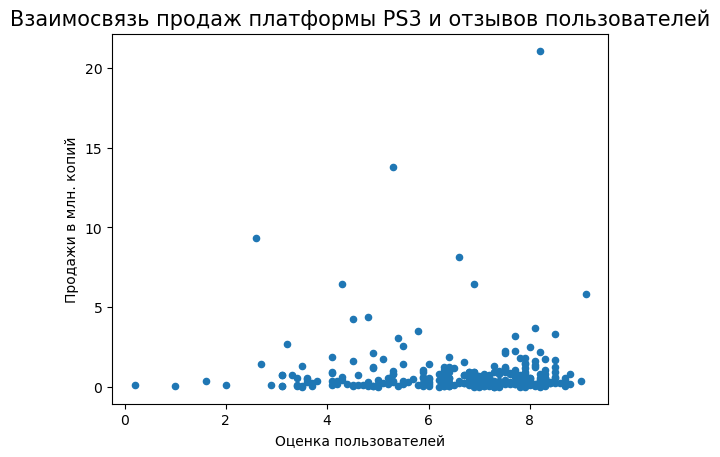

In [50]:
# Построим диаграмму рассеяния для суммарных продаж платформы PS3 и отзывов пользователей.
PS3 = dt.query('platform == "PS3"')
PS3.plot(y='total_sales', x='user_score', kind='scatter')
plt.title('Взаимосвязь продаж платформы PS3 и отзывов пользователей', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Оценка пользователей');

In [51]:
# Посчитаем коэффициент корреляции для суммарных продаж платформы PS4 и отзывов пользователей.
corr = PS3['total_sales'].corr(PS3['user_score']).round(2)
print('Коэффициент корреляции для суммарных продаж платформы PS3 и отзывов пользователей:', corr)

Коэффициент корреляции для суммарных продаж платформы PS3 и отзывов пользователей: -0.01


Таким образом, связи между продажами платформы PS3 и отзывами пользователей мы не наблюдаем, так как коэффициент корреляции слишком мал.

In [52]:
print(PS3.shape)
PS3.isna().sum()

(492, 12)


name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       279
user_score         210
rating               0
total_sales          0
dtype: int64

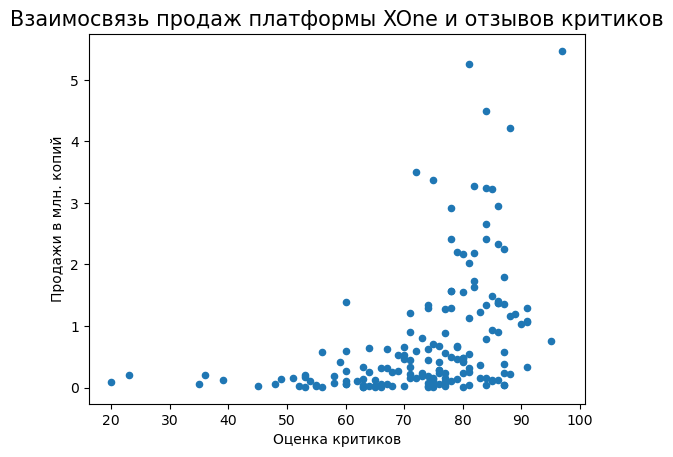

In [53]:
# Построим диаграмму рассеяния для суммарных продаж платформы XOne и отзывов критиков.
XOne = dt.query('platform == "XOne"')
XOne.plot(y='total_sales', x='critic_score', kind='scatter')
plt.title('Взаимосвязь продаж платформы XOne и отзывов критиков', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Оценка критиков');

In [54]:
# Посчитаем коэффициент корреляции для суммарных продаж платформы PS3 и отзывов критиков.
corr = XOne['total_sales'].corr(XOne['critic_score']).round(2)
print('Коэффициент корреляции для суммарных продаж платформы XOne и отзывов критиков:', corr)

Коэффициент корреляции для суммарных продаж платформы XOne и отзывов критиков: 0.42


Таким образом, мы можем наблюдать среднюю прямую связь между продажами платформы XOne и отзывами критиков.

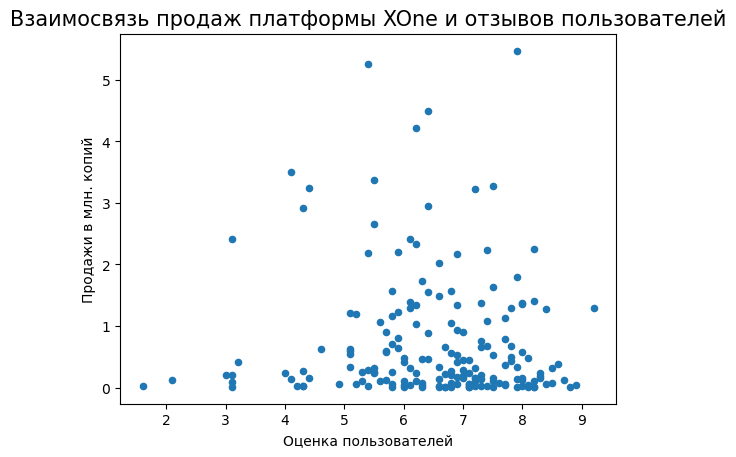

In [55]:
# Построим диаграмму рассеяния для суммарных продаж платформы XOne и отзывов пользователей.
XOne = dt.query('platform == "XOne"')
XOne.plot(y='total_sales', x='user_score', kind='scatter')
plt.title('Взаимосвязь продаж платформы XOne и отзывов пользователей', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Оценка пользователей');

In [56]:
# Посчитаем коэффициент корреляции для суммарных продаж платформы XOne и отзывов пользователей.
corr = XOne['total_sales'].corr(XOne['user_score']).round(2)
print('Коэффициент корреляции для суммарных продаж платформы XOne и отзывов пользователей:', corr)

Коэффициент корреляции для суммарных продаж платформы XOne и отзывов пользователей: -0.07


Таким образом, связи между продажами платформы XOne и отзывами пользователей мы не наблюдаем, так как коэффициент корреляции слишком мал.

In [57]:
print(XOne.shape)
XOne.isna().sum()

(247, 12)


name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score       78
user_score         65
rating              0
total_sales         0
dtype: int64

**Таким образом, наблюдается средняя прямая связь (чем выше оценка, тем больше продажи) между оценками критиков и продажами платформ PS4, PS3 и XOne. И не наблюдается связи между оценками пользователей и продажами. Однако наверняка говорить о том, есть связь или нет, мы не можем, так как приблизительно от трети до половины оценок пользователей и критиков по отдельной платформе отсутствуют.**

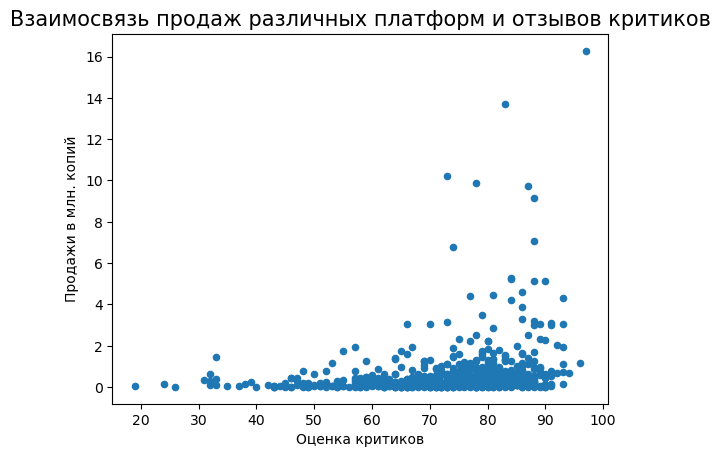

In [58]:
# Построим диаграмму рассеяния для суммарных продаж других платформ и отзывов критиков.
other = dt.query('platform != "PS4" & platform != "PS3" & platform != "XOne"')
other.plot(y='total_sales', x='critic_score', kind='scatter')
plt.title('Взаимосвязь продаж различных платформ и отзывов критиков', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Оценка критиков');

In [59]:
other['platform'].unique()

array(['X360', '3DS', 'DS', 'WiiU', 'Wii', 'PC', 'PSV', 'PSP'],
      dtype=object)

In [60]:
# Посчитаем коэффициент корреляции для суммарных продаж других платформ и отзывов критиков.
corr = other['total_sales'].corr(other['critic_score']).round(2)
print('Коэффициент корреляции для суммарных продаж других платформ и отзывов критиков:', corr)

Коэффициент корреляции для суммарных продаж других платформ и отзывов критиков: 0.25


Таким образом, мы можем наблюдать слабую прямую связь между продажами различных платформам и отзывами критиков.

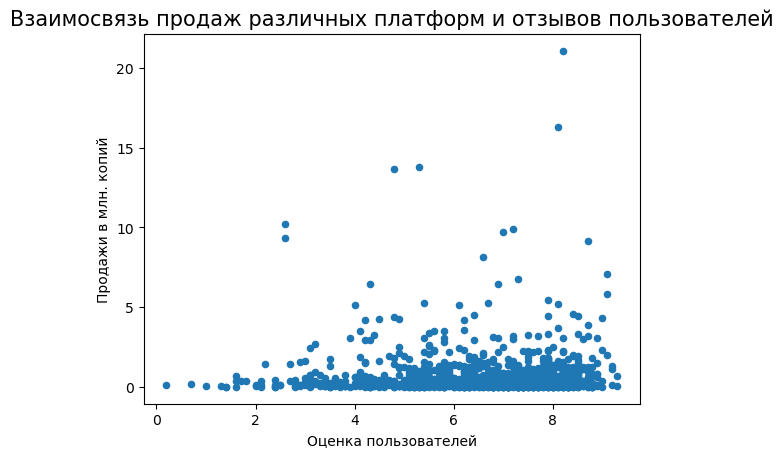

In [61]:
# Построим диаграмму рассеяния для суммарных продаж других платформ и отзывов пользователей.
other = dt.query('platform != "PS4"')
other.plot(y='total_sales', x='user_score', kind='scatter')
plt.title('Взаимосвязь продаж различных платформ и отзывов пользователей', fontsize=15)
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Оценка пользователей');

In [62]:
# Посчитаем коэффициент корреляции для суммарных продаж других платформ и отзывов пользователей.
corr = other['total_sales'].corr(other['user_score']).round(2)
print('Коэффициент корреляции для суммарных продаж других платформ и отзывов пользователей:', corr)

Коэффициент корреляции для суммарных продаж других платформ и отзывов пользователей: 0.01


Таким образом, связи между продажами различных платформ и отзывами пользователей мы не наблюдаем, так как коэффициент корреляции слишком мал.

**Сравнивая взаимосвязи между продажами нескольих популярных платформ и отзывами пользователей и критиков с взаимосвязями между продажами на других платформах и отзывами пользователей и критиков, можно сказать, что мы наблюдаем похожую картину: отзывы критиков на продажи влияют в средней степени (чем выше оценка, тем больше продажи), а отзывы пользователей практически не влияют.**

### Сравнение жанров.

In [63]:
# Посмотрим общее распределение игр по жанрам.
dt['genre'].value_counts()

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: count, dtype: int64

Таким образом, наибольшее количество игр принадлежат жанру экшен. А наименьшее количество игр относятся к головоломкам.

In [64]:
# Посмотрим на распределение суммарной прибыли по жанрам.
genre_sales = dt.groupby('genre').agg({'total_sales':'sum'})
genre_sales.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.06
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


In [65]:
# Посмотрим на распределение медианной прибыли по жанрам.
genre_sales = dt.groupby('genre').agg({'total_sales':'median'})
genre_sales.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


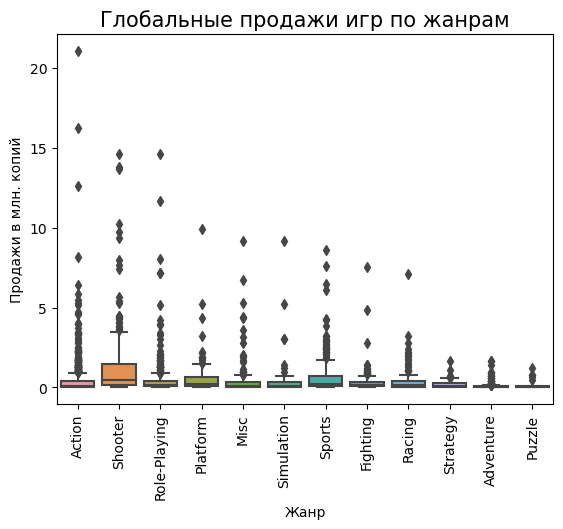

In [66]:
ax = sns.boxplot(data=dt, x='genre', y='total_sales')
ax.set_title('Глобальные продажи игр по жанрам', fontsize=15)
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи в млн. копий')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

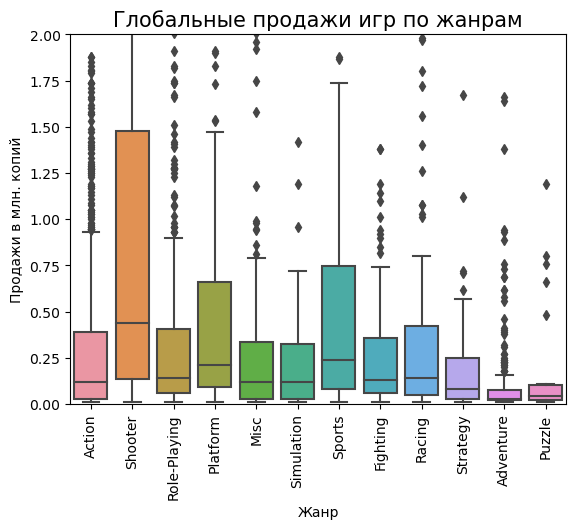

In [67]:
ax = sns.boxplot(data=dt, x='genre', y='total_sales')
ax.set(ylim=(0, 2))
ax.set_title('Глобальные продажи игр по жанрам', fontsize=15)
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи в млн. копий')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

**Таким образом, к жанрам, стабильно приносящим высокий доход, можно отнести шутер, спортивные игры и платформер. К жанрам с низкими доходами - приключения, головоломки и стратегические игры. Несмотря на то, что игр в жанре экшн в несколько раз больше, чем остальных, и суммарная прибыльность у них также самая высокая, на "ящике с усами" мы видим большое количество выбросов и довольно невысокий медианный доход, что говорит о том, что игры данного жанра не являются стабильно прибыльными.**

## Портрет пользователя каждого региона.

### Самые популярные платформы в различных регионах.

In [68]:
# Посмтроим сводную таблицу с продажами платформ в Северной Америке.
na = dt.groupby('platform').agg({'na_sales':'sum'}).reset_index()
na = na.sort_values(by='na_sales', ascending=False)
na

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31
8,WiiU,38.10
2,PC,19.12
7,Wii,17.45
6,PSV,10.98
1,DS,4.59


In [69]:
# Выделим топ-5 платформ по продажам в Северной Америке, а другие переименуем.
na.loc[na['na_sales']<50, 'platform'] = 'Other'
na

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31
8,Other,38.10
2,Other,19.12
7,Other,17.45
6,Other,10.98
1,Other,4.59


In [70]:
# Сгруппируем данные по платформам в Северной Америке.
na = na.groupby('platform').agg({'na_sales':'sum'}).reset_index()
na = na.sort_values(by='na_sales', ascending=False)
na

,platform,na_sales
4,X360,140.05
3,PS4,108.74
2,PS3,103.38
5,XOne,93.12
1,Other,90.37
0,3DS,55.31


In [71]:
# Посмтроим сводную таблицу с продажами платформ в Европе.
eu = dt.groupby('platform').agg({'eu_sales':'sum'}).reset_index()
eu = eu.sort_values(by='eu_sales', ascending=False)
eu

,platform,eu_sales
4,PS4,141.09
3,PS3,106.85
9,X360,74.52
10,XOne,51.59
0,3DS,42.64
2,PC,37.76
8,WiiU,25.13
7,Wii,11.92
6,PSV,11.36
1,DS,3.53


In [72]:
# Выделим топ-5 платформ по продажам в Европе, а другие переименуем.
eu.loc[eu['eu_sales']<40, 'platform'] = 'Other'
eu

,platform,eu_sales
4,PS4,141.09
3,PS3,106.85
9,X360,74.52
10,XOne,51.59
0,3DS,42.64
2,Other,37.76
8,Other,25.13
7,Other,11.92
6,Other,11.36
1,Other,3.53


In [73]:
# Сгруппируем данные по платформам в Европе.
eu = eu.groupby('platform').agg({'eu_sales':'sum'}).reset_index()
eu = eu.sort_values(by='eu_sales', ascending=False)
eu

,platform,eu_sales
3,PS4,141.09
2,PS3,106.85
1,Other,90.12
4,X360,74.52
5,XOne,51.59
0,3DS,42.64


In [74]:
# Посмтроим сводную таблицу с продажами платформ в Японии.
jp = dt.groupby('platform').agg({'jp_sales':'sum'}).reset_index()
jp = jp.sort_values(by='jp_sales', ascending=False)
jp

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01
5,PSP,10.47
1,DS,3.72
7,Wii,3.39
9,X360,1.57
10,XOne,0.34


In [75]:
# Выделим топ-5 платформ по продажам в Японии, а другие переименуем.
jp.loc[jp['jp_sales']<13, 'platform'] = 'Other'
jp

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01
5,Other,10.47
1,Other,3.72
7,Other,3.39
9,Other,1.57
10,Other,0.34


In [76]:
# Сгруппируем данные по платформам в Японии.
jp = jp.groupby('platform').agg({'jp_sales':'sum'}).reset_index()
jp = jp.sort_values(by='jp_sales', ascending=False)
jp

,platform,jp_sales
0,3DS,87.79
2,PS3,35.29
4,PSV,21.04
1,Other,19.49
3,PS4,15.96
5,WiiU,13.01


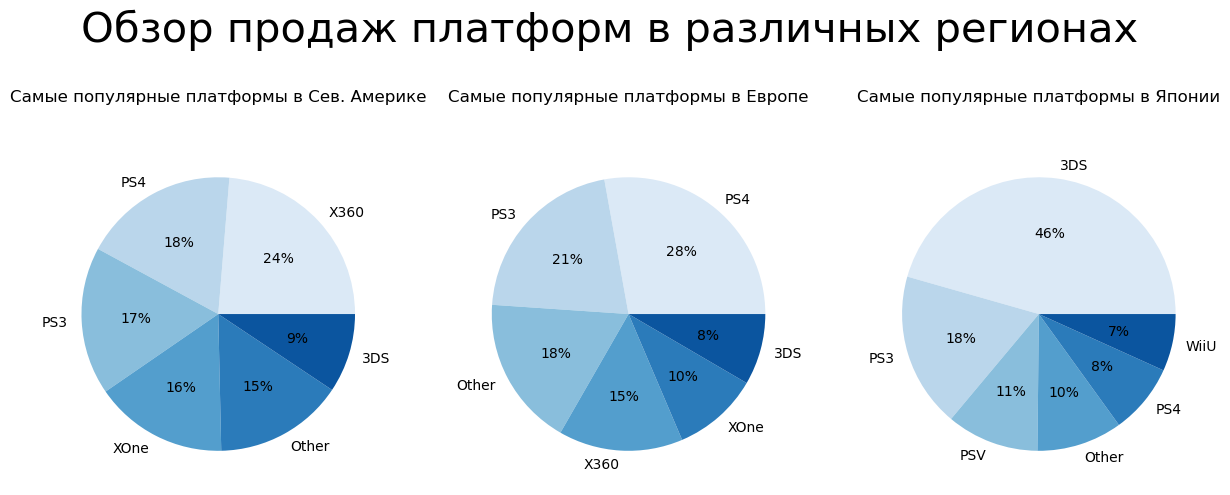

In [77]:
# Построим график с круговыми диаграммами по продажам на платформах для каждого региона.

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
ax[0].pie(na['na_sales'], labels=na['platform'], autopct='%1.0f%%', colors=sns.color_palette('Blues'))
ax[1].pie(eu['eu_sales'], labels=eu['platform'], autopct='%1.0f%%', colors=sns.color_palette('Blues'))
ax[2].pie(jp['jp_sales'], labels=jp['platform'], autopct='%1.0f%%', colors=sns.color_palette('Blues'))

ax[0].set_title('Самые популярные платформы в Сев. Америке', y=1.1)
ax[1].set_title('Самые популярные платформы в Европе', y=1.1)
ax[2].set_title('Самые популярные платформы в Японии', y=1.1)
fig.suptitle('Обзор продаж платформ в различных регионах', fontsize=30, y=0.8)
plt.show()

**Таким образом, мы видим по графикам, что в разных регионах наблюдаются некоторые различия относительно популярности платформ. Так, в Северной Америке самой популярной платформой является X360 (24% продаж), в то время как в Европе она находится на 3 месте (15% продаж), а в Японии вообще не входит в топ-5 самых популярных платформ. При этом в Японии самой популярной платформой является 3DS, она охватывает почти половину всех продаж компьютерных игр (46%). Однако в Северной Америке и Европе она находится на 5 месте топа платформ, охватывая 9% и 8% продаж соответственно. Примерно одинаковой популярностью во всех представленных регионах пользуется платформа PS3. Платформа PS4 (самая прибыльная в общей сложности за последние 5 лет) наиболее популярна в Европе (28% продаж), менее популярна в Северной Америке (18% продаж), и наименее - в Японии (18% продаж). Платформа XOne находится на 4 месте в рейтинге в Северной Америке и Европе (16% и 10% продаж соответственно), но не входит в топ-5 в Японии. В Японии в топ-5 популярных платформ входят также платформы PSV (11% продаж) и WiiU (7% продаж), которые не представлены в топе Северной Америки и Европы.**

### Самые популярные жанры в различных регионах.

In [78]:
# Построим сводные таблицы с продажами по жанрам для разных регионов.

print('Северная Америка')
na_g = dt.groupby('genre').agg({'na_sales':'sum'}).reset_index()
na_g = na_g.sort_values(by='na_sales', ascending=False)
display(na_g)

print('Европа')
eu_g = dt.groupby('genre').agg({'eu_sales':'sum'}).reset_index()
eu_g = eu_g.sort_values(by='eu_sales', ascending=False)
display(eu_g)

print('Япония')
jp_g = dt.groupby('genre').agg({'jp_sales':'sum'}).reset_index()
jp_g = jp_g.sort_values(by='jp_sales', ascending=False)
jp_g

Северная Америка


,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19
4,Platform,25.38
2,Fighting,19.79
6,Racing,17.22
1,Adventure,8.92
9,Simulation,7.97


Европа


,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.08
7,Role-Playing,48.53
6,Racing,27.29
3,Misc,26.32
4,Platform,21.41
9,Simulation,14.55
2,Fighting,10.79
1,Adventure,9.46


Япония


,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44
8,Shooter,9.23
4,Platform,8.63
1,Adventure,8.24
10,Sports,8.01
11,Strategy,2.88


In [79]:
# Выделим топ-5 платформ по продажам в Японии, а другие переименуем.
na_g.loc[na_g['na_sales']<30, 'genre'] = 'Other'
eu_g.loc[eu_g['eu_sales']<27, 'genre'] = 'Other'
jp_g.loc[jp_g['jp_sales']<9.40, 'genre'] = 'Other'

# Сгруппируем данные по платформам.
print('Северная Америка')
na_g = na_g.groupby('genre').agg({'na_sales':'sum'}).reset_index()
na_g = na_g.sort_values(by='na_sales', ascending=False)
display(na_g)

print('Европа')
eu_g = eu_g.groupby('genre').agg({'eu_sales':'sum'}).reset_index()
eu_g = eu_g.sort_values(by='eu_sales', ascending=False)
display(eu_g)

print('Япония')
jp_g = jp_g.groupby('genre').agg({'jp_sales':'sum'}).reset_index()
jp_g = jp_g.sort_values(by='jp_sales', ascending=False)
display(jp_g)

Северная Америка


,genre,na_sales
0,Action,177.84
4,Shooter,144.77
2,Other,84.64
5,Sports,81.53
3,Role-Playing,64.00
1,Misc,38.19


Европа


,genre,eu_sales
0,Action,159.34
4,Shooter,113.47
1,Other,89.10
5,Sports,69.08
3,Role-Playing,48.53
2,Racing,27.29


Япония


,genre,jp_sales
4,Role-Playing,65.44
0,Action,52.80
3,Other,41.63
2,Misc,12.86
5,Simulation,10.41
1,Fighting,9.44


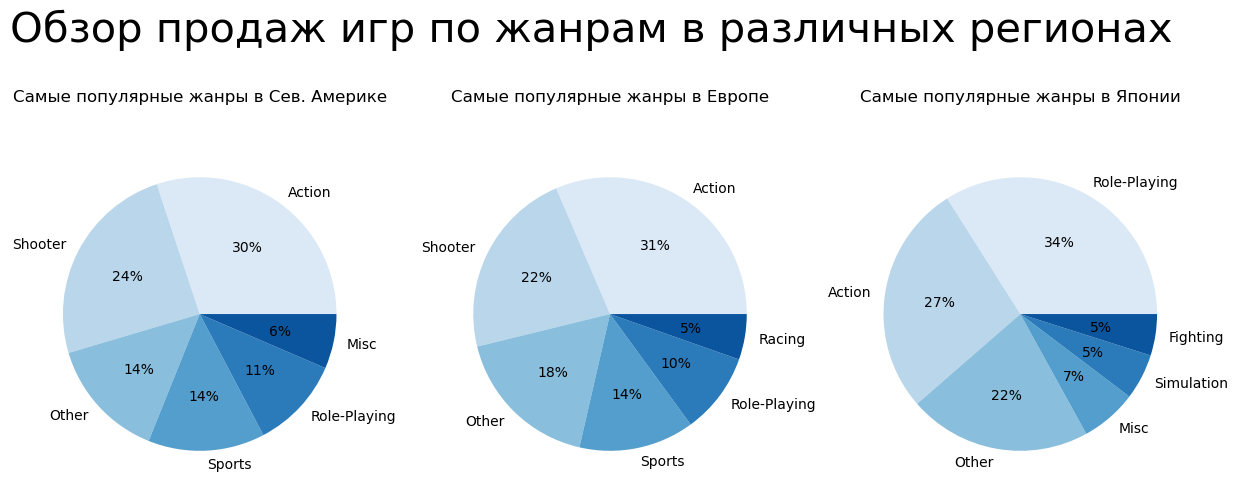

In [80]:
# Построим график с круговыми диаграммами по продажам на платформах для каждого региона.

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
ax[0].pie(na_g['na_sales'], labels=na_g['genre'], autopct='%1.0f%%', colors=sns.color_palette('Blues'))
ax[1].pie(eu_g['eu_sales'], labels=eu_g['genre'], autopct='%1.0f%%', colors=sns.color_palette('Blues'))
ax[2].pie(jp_g['jp_sales'], labels=jp_g['genre'], autopct='%1.0f%%', colors=sns.color_palette('Blues'))

ax[0].set_title('Самые популярные жанры в Сев. Америке', y=1.1)
ax[1].set_title('Самые популярные жанры в Европе', y=1.1)
ax[2].set_title('Самые популярные жанры в Японии', y=1.1)
fig.suptitle('Обзор продаж игр по жанрам в различных регионах', fontsize=30, y=0.8)
plt.show()

**Таким образом, в Северной Америке и Европе наиболее популярным жанром является экшен (около трети всех продаж), в Японии он на втором месте, однако процент продаж не намного меньше, чем в двух других регионах (на 3-4%). В Японии же самым популярным жанром является ролевая игра (34% продаж). В Северной Америке и Европе топ-5 популярных жанров не сильно отличается: на первом месте - экшн, на втором - шутер, на третьем - спортивная игра, на четвертом - ролевая игра, только на пятом есть отлиия: в Северной Америке на пятом месте мультижанровые игры, а в Европе - гоночная игра. В Японии же в топ-5 популярных жанров входят, помимо ролевой игры, экшена и мультижанровых игр, симулятор и файтинг, которые не входят в топ двух других регионов.
Вероятнее всего, разницу в популярности жанров можно объяснить различиями в образе жизни, менталитете в разных регионах. Северная Америка и Европа во многом схожи по этим параметрам, в то время как Япония представляет собой более отличный от двух других мир.**

### Влияние рейтинга ESRB на продажи по регионам.

In [81]:
# Построим сводные таблицы с продажами, сгруппированные по рейтингу.

print('Северная Америка')
na_r = dt.groupby('rating')['na_sales'].sum().reset_index()
na_r = na_r.loc[na_r['rating']!='Не определен']
display(na_r)

print('Европа')
eu_r = dt.groupby('rating')['eu_sales'].sum().reset_index()
eu_r = eu_r.loc[eu_r['rating']!='Не определен']
display(eu_r)

print('Япония')
jp_r = dt.groupby('rating')['jp_sales'].sum().reset_index()
jp_r = jp_r.loc[jp_r['rating']!='Не определен']
display(jp_r)

Северная Америка


,rating,na_sales
0,E,114.37
1,E10+,75.70
2,M,231.57
3,T,66.02


Европа


,rating,eu_sales
0,E,113.02
1,E10+,55.37
2,M,193.96
3,T,52.96


Япония


,rating,jp_sales
0,E,28.33
1,E10+,8.19
2,M,21.20
3,T,26.02


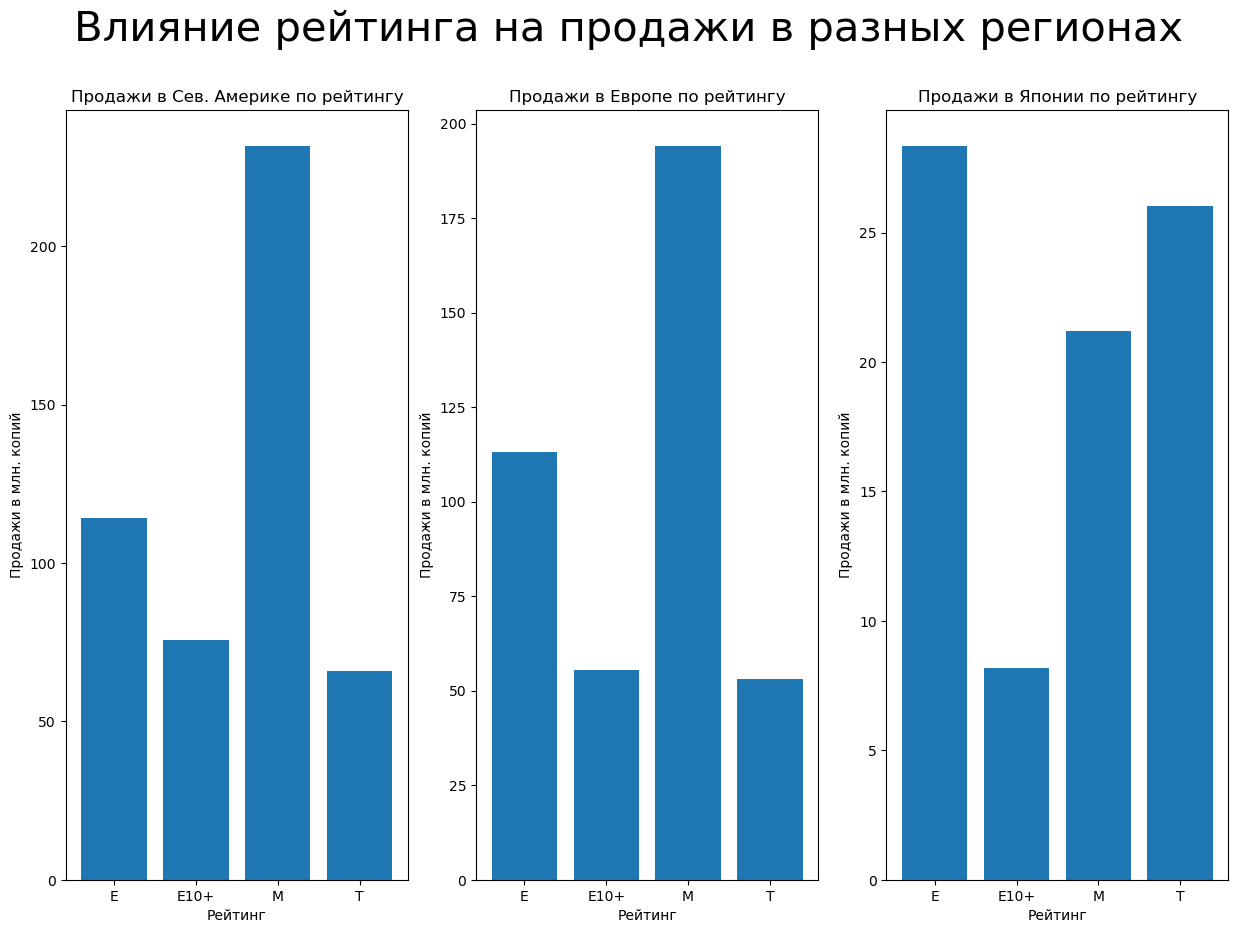

In [82]:
# Построим столбчатые диаграммы по продажам в зависимости от рейтинга в разных регионах.

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

ax[0].bar(na_r['rating'], na_r['na_sales'])
ax[1].bar(eu_r['rating'], eu_r['eu_sales'])
ax[2].bar(jp_r['rating'], jp_r['jp_sales'])

ax[0].set_title('Продажи в Сев. Америке по рейтингу')
ax[0].set_xlabel('Рейтинг')
ax[0].set_ylabel('Продажи в млн. копий')

ax[1].set_title('Продажи в Европе по рейтингу')
ax[1].set_xlabel('Рейтинг')
ax[1].set_ylabel('Продажи в млн. копий')

ax[2].set_title('Продажи в Японии по рейтингу')
ax[2].set_xlabel('Рейтинг')
ax[2].set_ylabel('Продажи в млн. копий')
 
fig.suptitle('Влияние рейтинга на продажи в разных регионах', fontsize=30)
plt.show()

**Таким образом, мы видим, что в Северной Америке и Европе игры с рейтингом М ("Для взрослых") лидируют по продажам, на втором месте игры с рейтингом Е ("Для всех"), и наименее популярными явлюятся игры с рейтингами Е10+ ("Для всех от 10 лет и старше") и Т ("Подросткам"). В Японии же лидерами продаж являются игры с рейтингами Е ("Для всех") и Т ("Подросткам"), чуть менее популярны игры с рейтингом М ("Для взрослых"), и на последнем месте по продажам стоят игры с рейтингом Е10+ ("Для всех от 10 лет и старше").**

## Проверка гипотез.

### Рейтингки платформ.

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Нулевая гипотеза**: средние пользовательские рейтинги платформ Xbox One и PC равны.

**Альтернативная гипотеза**: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [83]:
XOne = dt.query('platform == "XOne"')
XOne = XOne.dropna(subset=['user_score'])
XOne.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
241,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
269,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
372,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [84]:
PC = dt.query('platform == "PC"')
PC = PC.dropna(subset=['user_score'])
PC.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
191,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
455,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
679,Guild Wars 2,PC,2012,Action,0.96,1.07,0.0,0.27,90.0,7.9,T,2.30
948,World of Warcraft: Mists of Pandaria,PC,2012,Role-Playing,0.84,0.76,0.0,0.22,82.0,4.8,T,1.82
1084,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67


In [85]:
alpha = 0.05
results = st.ttest_ind(XOne['user_score'], PC['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


В данном случае мы применили тест для проверки равенства средних двух независимых выборок, так как мы имеем две разные выборки, не связанные друг с другом.

Таким образом, так как pvalue больше альфа, мы принимаем нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.

### Рейтингки жанров.

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

**Нулевая гипотеза**: средние пользовательские рейтинги жанров Action и Sports равны.

**Альтернативная гипотеза**: средние пользовательские рейтинги жанров Action и Sports не равны.

In [86]:
Action = dt.query('genre == "Action"')
Action = Action.dropna(subset=['user_score'])
Action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
127,Assassin's Creed III,PS3,2012,Action,2.64,2.52,0.16,1.12,85.0,6.9,M,6.44


In [87]:
Sports = dt.query('genre == "Sports"')
Sports = Sports.dropna(subset=['user_score'])
Sports.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
263,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28


In [88]:
alpha = 0.05
results = st.ttest_ind(Action['user_score'], Sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.804523380462917e-26
Отвергаем нулевую гипотезу


В данном случае мы применили тест для проверки равенства средних двух независимых выборок, так как мы имеем две разные выборки, не связанные друг с другом.

Таким образом, так как pvalue меньше альфа, мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

## Вывод.

Таким образом, в процессе исследования мы изучили датафрейм, содержащий исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Мы проверили его на наличие пропущенных значений и дубликатов, обработали пропуски и дубликаты, преобразовали названия столбцов, привели данные к нужному типу, создали новый столбец с суммарными продажами.

Также мы провели исследовательский анализ данных, в результате которого сделали вывод о том, что количество игр стало резко расти в 1994 году и к 2008 году увеличилось почти в 12 раз, а после 2009 года количество выпускаемых игр стало резко падать. В 2016 году оно составило 502 игры, что почти в 3 раза меньше, чем в 2008 году. Также примерно одинаковое количество игр выпускается за последние 5 лет. Далее мы вывели топ-6 платформ по суммарным продажам, изучили их жизненный цикл и пришли к выводу о том, что в среднем платформы живут около 11 лет. По результатам проведенного исследовательского анализа, для дальнейшей работы мы отобрали данные за актуальный период, равный последним пяти годам, с 2012 по 2016 год, так как в это время выпускалось примерно одинаковое количество игр, а также половина жизни платформы равна приблизительно пяти годам.

Мы проанализировали прибыльность платформ и выявили, что за последние 5 лет по продажам лидируют платформы PS4, PS3 и X360. Если не брать во внимание данные за 2016 год, так как они могут быть неполными, то можно сказать, что растут в продажах платформы PS4 и XOne. Заметно падают в продажах платформы PS3, X360 и 3DS. Остальные платформы последние 5 лет находятся на низком уровне по продажам. Таким образом, к потенциально прибыльным платформам мы отнесли самые молодые и растущие в продажах платформы PS4 и XOne.

Также мы изучили взаимосвязь между оценка пользователей и критиков и продажами платформ. Мы сравнили три популярные платформы и другие платформы и пришли к выводу о том, что в обоих случаях отзывы критиков на продажи влияют в средней степени (чем выше оценка, тем больше продажи), а отзывы пользователей практически не влияют.

Далее мы проанализирова популярность игр по жанрам и выявили, что к жанрам, стабильно приносящим высокий доход, можно отнести шутер, спортивные игры и платформер. К жанрам с низкими доходами - приключения, головоломки и стратегические игры. Несмотря на то, что игр в жанре экшн в несколько раз больше, чем остальных, и суммарная прибыльность у них также самая высокая, на "ящике с усами" мы видим большое количество выбросов и довольно невысокий медианный доход, что говорит о том, что игры данного жанра не являются стабильно прибыльными.

Следующим шагом мы составили портреты пользователей для таких регионов как Северная Америка, Европа и Япония. Мы определили самые популярные платформы, жанры в данных регионах, а также оценили, влияет ли рейтинг ESRB на продажи в отдельном регионе. Мы пришли к следующим выводам:
- в разных регионах наблюдаются некоторые различия относительно популярности платформ. Так, в Северной Америке самой популярной платформой является X360 (24% продаж), в то время как в Европе она находится на 3 месте (15% продаж), а в Японии вообще не входит в топ-5 самых популярных платформ. При этом в Японии самой популярной платформой является 3DS, она охватывает почти половину всех продаж компьютерных игр (46%). Однако в Северной Америке и Европе она находится на 5 месте топа платформ, охватывая 9% и 8% продаж соответственно. Примерно одинаковой популярностью во всех представленных регионах пользуется платформа PS3. Платформа PS4 (самая прибыльная в общей сложности за последние 5 лет) наиболее популярна в Европе (28% продаж), менее популярна в Северной Америке (18% продаж), и наименее - в Японии (18% продаж). Платформа XOne находится на 4 месте в рейтинге в Северной Америке и Европе (16% и 10% продаж соответственно), но не входит в топ-5 в Японии. В Японии в топ-5 популярных платформ входят также платформы PSV (11% продаж) и WiiU (7% продаж), которые не представлены в топе Северной Америки и Европы;
- в Северной Америке и Европе наиболее популярным жанром является экшен (около трети всех продаж), в Японии он на втором месте, однако процент продаж не намного меньше, чем в двух других регионах (на 3-4%). В Японии же самым популярным жанром является ролевая игра (34% продаж). В Северной Америке и Европе топ-5 популярных жанров не сильно отличается: на первом месте - экшн, на втором - шутер, на третьем - спортивная игра, на четвертом - ролевая игра, только на пятом есть отлиия: в Северной Америке на пятом месте мультижанровые игры, а в Европе - гоночная игра. В Японии же в топ-5 популярных жанров входят, помимо ролевой игры, экшена и мультижанровых игр, симулятор и файтинг, которые не входят в топ двух других регионов. Вероятнее всего, разницу в популярности жанров можно объяснить различиями в образе жизни, менталитете в разных регионах. Северная Америка и Европа во многом схожи по этим параметрам, в то время как Япония представляет собой более отличный от двух других мир;
- в Северной Америке и Европе игры с рейтингом М ("Для взрослых") лидируют по продажам, на втором месте игры с рейтингом Е ("Для всех"), и наименее популярными явлюятся игры с рейтингами Е10+ ("Для всех от 10 лет и старше") и Т ("Подросткам"). В Японии же лидерами продаж являются игры с рейтингами Е ("Для всех") и Т ("Подросткам"), чуть менее популярны игры с рейтингом М ("Для взрослых"), и на последнем месте по продажам стоят игры с рейтингом Е10+ ("Для всех от 10 лет и старше").

Последним шагом мы проверили две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

В результате проверки, подтвердились обе гипотезы. Таким образом, оказалось, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные.

На основании проведенного анализа можно дать следующие рекомендации:
1. В отношении платформ, на которых будут выпускаться игры, стоит обратить внимание на молодые и растущие в продажах платформы PS4 и XOne. Однако, если игры будут выпускаться также в Японии, то здесь это, в первую очередь, платформа 3DS.
2. Относительно жанра можно отметить те, которые стабильно приносят высокий доход и являются наиболее популярными в различных регионах. Для Европы и Северной Америки это шутер и спортивная игра, для Японии - ролевая игра. Несмотря на то, что игр в жанре экшн больше всего, и у них самый высокий суммарный доход, "выстреливают" они не всегда.
3. В отношении рейтинга игры стоит обратить внимание на игры с рейтингом М ("Для взрослых"), если это Европа и Северная Америка, и на игры с рейтингом Е ("Для всех") и Т ("Подросткам"), если это Япония.